In [1]:
#import packages and verify versions

# numpy
import numpy as np
print('numpy: %s' % np.__version__)
# scipy
import scipy
print('scipy: %s' % scipy.__version__)
# matplotlib
import matplotlib
print('matplotlib: %s' % matplotlib.__version__)
# pandas
import pandas as pd
print('pandas: %s' % pd.__version__)
# scikit-learn
import sklearn
print('sklearn: %s' % sklearn.__version__)


numpy: 1.18.1
scipy: 1.4.1
matplotlib: 3.1.3
pandas: 1.0.3
sklearn: 0.22.1


# Case Study : Higgs Bosson Challenge 


The challenge data is now available on http://opendata.cern.ch/collection/ATLAS-Higgs-Challenge-2014. The case study is to classify the events into signals and background, any other event other than the signal. This is a binary classification problem. Instead of the entire data set, we have used a sample data set which has training data size of 10000 and a separate testing data of size 5000 with labels on which models will be evaluated. We will also assume the best model is selected based on the classification accuracy achieved on the test data, with metrics of accuracy, as the data is well balanced between the two classes.

# 1. Loading Training and Testing CSV files using Pandas

In [2]:
train_file = './data/higgs_train_10k.csv'
test_file = './data/higgs_test_5k.csv'
names = [
    'response',
    'x1',
    'x2',
    'x3',
    'x4',
    'x5',
    'x6',
    'x7',
    'x8',
    'x9',
    'x10',
    'x11',
    'x12',
    'x13',
    'x14',
    'x15',
    'x16',
    'x17',
    'x18',
    'x19',
    'x20',
    'x21',
    'x22',
    'x23',
    'x24',
    'x25',
    'x26',
    'x27',
    'x28']
train_data = pd.read_csv(train_file, names=names)
test_data = pd.read_csv(test_file, names=names)
print(train_data.shape)
print(test_data.shape)


(10000, 29)
(5000, 29)


# 2. Exploratory Data Analysis

In [3]:
# give the peek into the dataset
peek = train_data.head(20)
peek

,response,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28
0,1.0,0.869,-0.635,0.22600,0.327,-0.6900,0.754,-0.2490,-1.0900,0.00,...,-0.0105,-0.045800,3.1,1.350,0.980,0.978,0.920,0.722,0.989,0.877
1,1.0,0.908,0.329,0.35900,1.500,-0.3130,1.100,-0.5580,-1.5900,2.17,...,-1.1400,-0.000819,0.0,0.302,0.833,0.986,0.978,0.780,0.992,0.798
2,1.0,0.799,1.470,-1.64000,0.454,0.4260,1.100,1.2800,1.3800,0.00,...,1.1300,0.900000,0.0,0.910,1.110,0.986,0.951,0.803,0.866,0.780
3,0.0,1.340,-0.877,0.93600,1.990,0.8820,1.790,-1.6500,-0.9420,0.00,...,-0.6780,-1.360000,0.0,0.947,1.030,0.999,0.728,0.869,1.030,0.958
4,1.0,1.110,0.321,1.52000,0.883,-1.2100,0.681,-1.0700,-0.9220,0.00,...,-0.3740,0.113000,0.0,0.756,1.360,0.987,0.838,1.130,0.872,0.808
5,0.0,1.600,-0.608,0.00707,1.820,-0.1120,0.848,-0.5660,1.5800,2.17,...,-0.6540,-1.270000,3.1,0.824,0.938,0.972,0.789,0.431,0.961,0.958
6,1.0,0.409,-1.880,-1.03000,1.670,-1.6000,1.340,0.0554,0.0135,2.17,...,0.0695,1.380000,3.1,0.869,1.220,1.000,0.545,0.699,0.977,0.829
7,1.0,0.934,0.629,0.52800,0.238,-0.9670,0.548,-0.0594,-1.7100,2.17,...,1.2900,-1.470000,0.0,0.902,1.080,0.980,0.783,0.849,0.894,0.775
8,1.0,1.410,0.537,0.69000,1.180,-0.1100,3.200,-1.5300,-1.5800,0.00,...,-0.1510,1.160000,0.0,1.670,4.040,1.180,1.050,1.540,3.530,2.740
9,1.0,1.180,0.104,1.40000,0.480,0.2660,1.140,1.5300,-0.2530,0.00,...,0.2690,0.530000,0.0,0.833,0.774,0.986,1.100,0.849,0.937,0.812


In [4]:
# datatype of each feataure
types = train_data.dtypes
types

response    float64
x1          float64
x2          float64
x3          float64
x4          float64
x5          float64
x6          float64
x7          float64
x8          float64
x9          float64
x10         float64
x11         float64
x12         float64
x13         float64
x14         float64
x15         float64
x16         float64
x17         float64
x18         float64
x19         float64
x20         float64
x21         float64
x22         float64
x23         float64
x24         float64
x25         float64
x26         float64
x27         float64
x28         float64
dtype: object

In [5]:
#base statistics for data
pd.set_option('display.width', 100)
pd.set_option('precision', 5)
description = train_data.describe()
description

,response,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28
count,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,...,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000
mean,0.52950,0.99794,-0.01666,-0.00347,0.99140,-0.00980,0.99203,-0.00148,0.00375,1.00402,...,0.00125,-0.01481,0.99851,1.02914,1.02142,1.05084,1.01251,0.96770,1.03122,0.95787
std,0.49915,0.57498,1.00302,1.01083,0.59549,1.00477,0.47739,1.00408,1.01590,1.02555,...,1.00542,1.00101,1.39611,0.63723,0.36961,0.16594,0.40492,0.52318,0.36620,0.31336
min,0.00000,0.27500,-2.43000,-1.74000,0.01240,-1.74000,0.15900,-2.94000,-1.74000,0.00000,...,-2.50000,-1.74000,0.00000,0.17200,0.34200,0.46100,0.38400,0.08100,0.38900,0.44500
25%,0.00000,0.59600,-0.74400,-0.87200,0.57100,-0.88600,0.68000,-0.68250,-0.89225,0.00000,...,-0.70800,-0.88500,0.00000,0.79000,0.84700,0.98600,0.76800,0.67500,0.82300,0.77100
50%,1.00000,0.85900,-0.02880,0.00064,0.88600,-0.01995,0.89750,-0.00993,0.02040,1.09000,...,-0.00129,-0.01410,0.00000,0.89500,0.94900,0.99000,0.91700,0.86900,0.94550,0.87150
75%,1.00000,1.25000,0.71500,0.88200,1.29000,0.85700,1.17000,0.68000,0.87900,2.17000,...,0.72000,0.84700,3.10000,1.02000,1.08000,1.02000,1.15000,1.12000,1.13000,1.06000
max,1.00000,6.70000,2.43000,1.74000,5.82000,1.74000,7.06000,2.97000,1.74000,2.17000,...,2.50000,1.74000,3.10000,13.10000,7.39000,3.68000,6.58000,8.26000,4.75000,4.32000


In [6]:
# class distribution for train and test
train_data_class = train_data.groupby('response').size()
print(train_data_class)
test_data_class = test_data.groupby('response').size()
print(test_data_class)

response
0.0    4705
1.0    5295
dtype: int64
response
0    2315
1    2685
dtype: int64


In [7]:
# pearsons correlation to understand feature independence
correlations = train_data.corr(method='pearson')
correlations

,response,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28
response,1.00000,-0.04341,-0.01785,0.00383,-0.09870,-9.92601e-03,0.06545,0.00202,-0.00466,-0.02024,...,0.00740,-0.00442,0.02201,0.00450,0.01726,0.00681,-0.02773,-1.53600e-01,-0.06361,-0.12084
x1,-0.04341,1.00000,-0.00200,-0.00684,-0.14662,-7.27591e-03,0.17019,-0.00862,-0.00380,-0.00040,...,0.00513,0.00411,0.00532,0.03081,0.02668,0.27440,0.10003,-5.23772e-03,0.09333,0.14165
x2,-0.01785,-0.00200,1.00000,-0.00103,-0.00454,1.02144e-02,-0.01699,0.27630,-0.00025,-0.01056,...,0.16942,0.00104,0.00658,-0.00419,-0.00377,-0.00167,-0.01554,-4.52646e-03,-0.01731,-0.01066
x3,0.00383,-0.00684,-0.00103,1.00000,-0.00350,-5.61581e-02,-0.00567,0.01561,-0.16534,-0.01105,...,0.00238,-0.07487,-0.00757,0.01669,0.01368,-0.01186,0.00204,-3.83245e-03,-0.00301,0.00602
x4,-0.09870,-0.14662,-0.00454,-0.00350,1.00000,8.70675e-03,0.20092,-0.01062,-0.00384,-0.01892,...,0.01196,-0.00368,0.00977,0.04562,0.04361,0.17634,0.28548,5.67451e-02,0.22681,0.31308
x5,-0.00993,-0.00728,0.01021,-0.05616,0.00871,1.00000e+00,-0.00663,-0.00079,-0.15644,-0.00732,...,-0.00583,-0.03753,0.00057,-0.00283,0.00080,0.00104,-0.00836,-5.96270e-06,0.00130,-0.00011
x6,0.06545,0.17019,-0.01699,-0.00567,0.20092,-6.62733e-03,1.00000,-0.01044,-0.00944,-0.01390,...,-0.01140,0.00676,-0.00343,0.17054,0.25106,0.04071,0.28716,3.43032e-01,0.47440,0.44176
x7,0.00202,-0.00862,0.27630,0.01561,-0.01062,-7.87953e-04,-0.01044,1.00000,-0.00855,-0.00398,...,0.17951,-0.00100,-0.00666,-0.00500,-0.00763,-0.00312,-0.00668,1.77150e-03,-0.01075,-0.01375
x8,-0.00466,-0.00380,-0.00025,-0.16534,-0.00384,-1.56438e-01,-0.00944,-0.00855,1.00000,-0.01194,...,-0.00498,-0.11531,-0.00219,-0.00332,-0.01370,0.01247,-0.01188,-5.74688e-03,-0.01700,-0.01147
x9,-0.02024,-0.00040,-0.01056,-0.01105,-0.01892,-7.31785e-03,-0.01390,-0.00398,-0.01194,1.00000,...,0.00126,0.00392,-0.24131,-0.11485,-0.06610,0.00482,0.13391,2.82755e-01,0.10902,0.00935


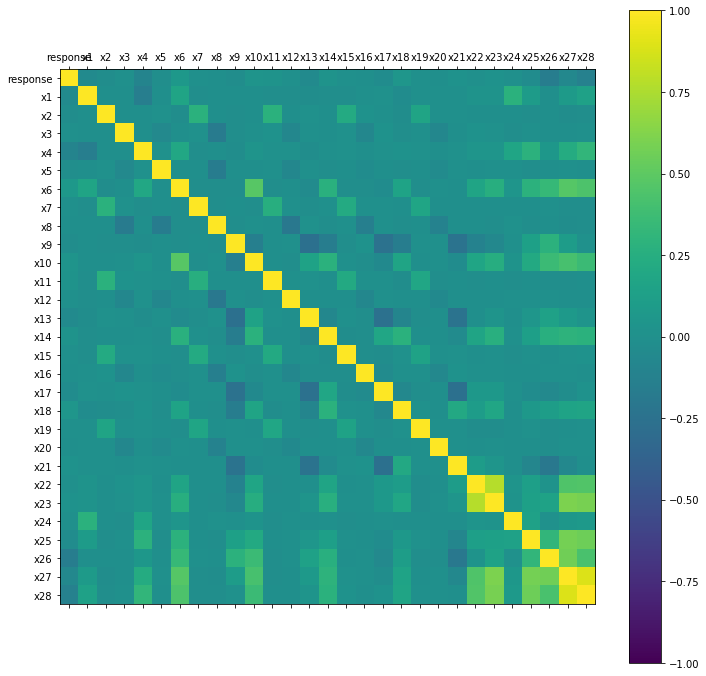

In [9]:
# visualization of correlations
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,29,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.rcParams['figure.figsize'] = (27,27)

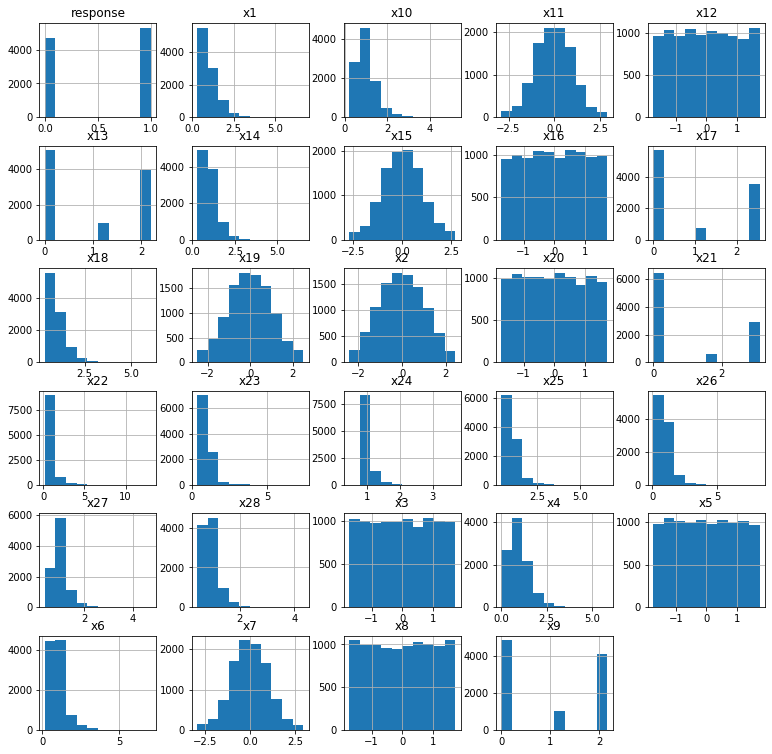

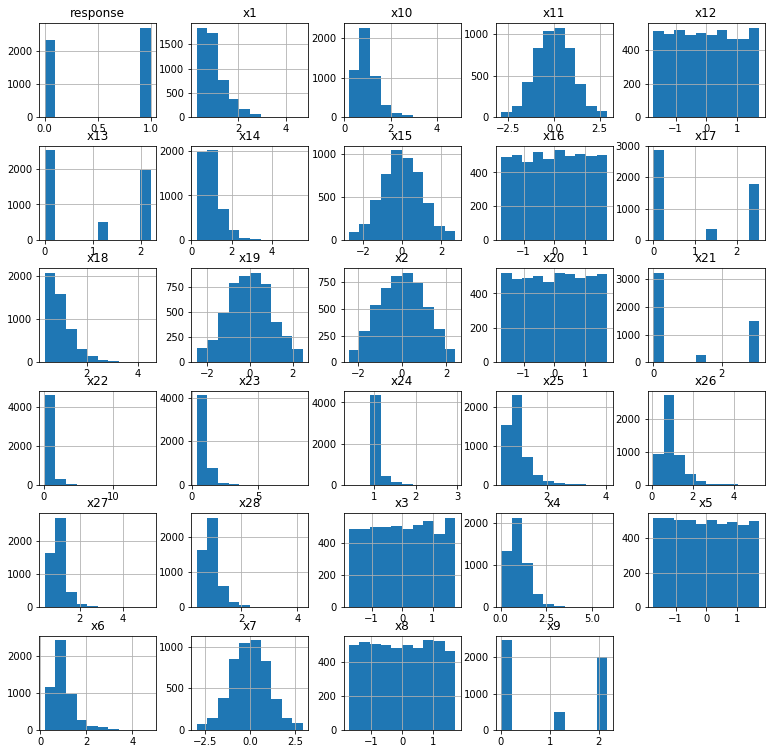

In [10]:
# visualization using pyplot and histograms of training and testing data
plt.rcParams['figure.figsize'] = (13,13)
_ = train_data[names].hist()
_ = test_data[names].hist()

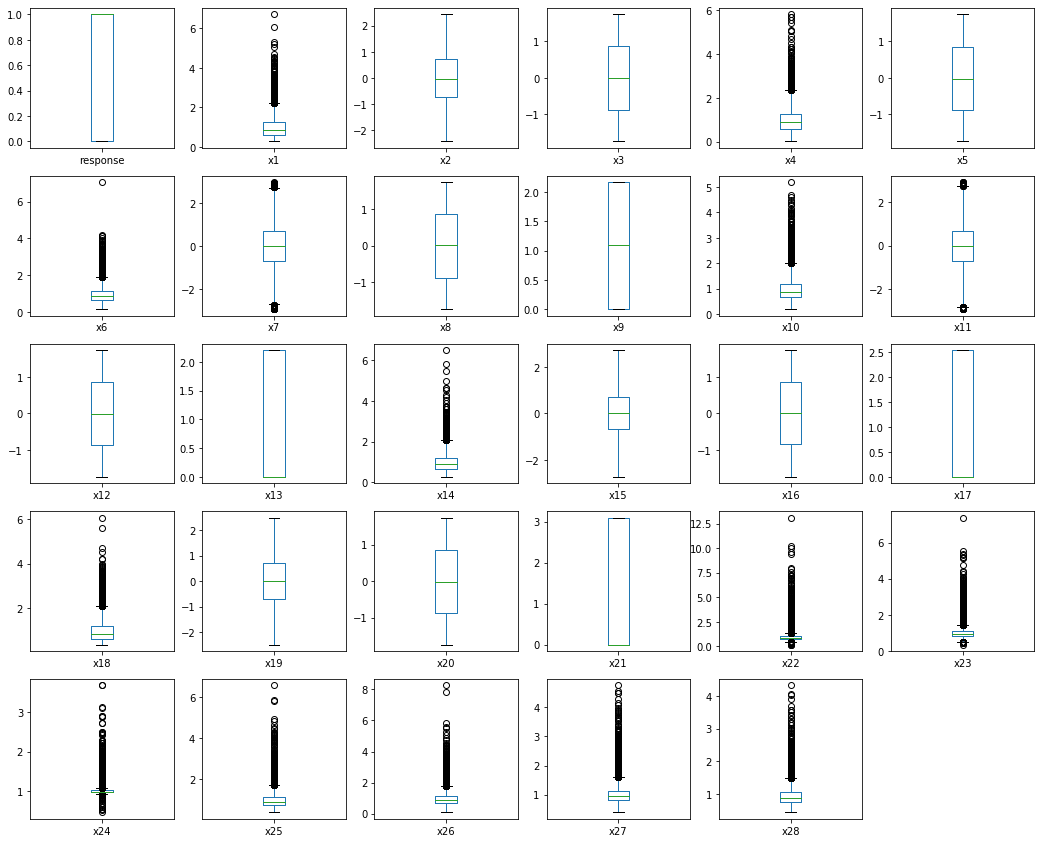

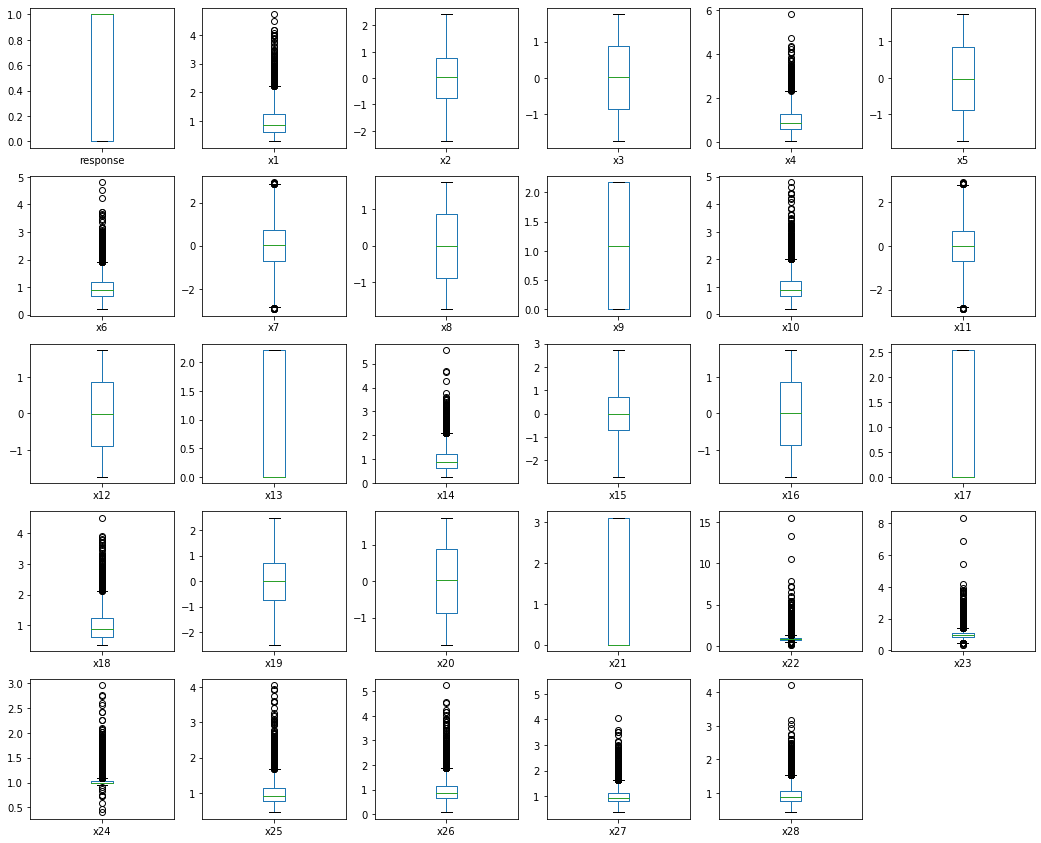

In [11]:
# boxplot visualization of train and test data
plt.rcParams['figure.figsize'] = (18,18)
_ = train_data.plot(kind='box', subplots=True, layout=(6,6), sharex=False, sharey=False)
_ = test_data.plot(kind='box', subplots=True, layout=(6,6), sharex=False, sharey=False)

# 3. Train and Test Data as Vector/Matrix Representation for Modeling

In [12]:
# train data
train_array = train_data.values
# separate array into input and output variables
X_train = train_array[:, 1:28]
y_train = train_array[:, 0]
# test data
test_array = test_data.values
# separate array into input and output variables
X_test = test_array[:, 1:28]
y_test = test_array[:, 0]

## Manifold Visualization of Data

Isomap: 1.2e+02 sec


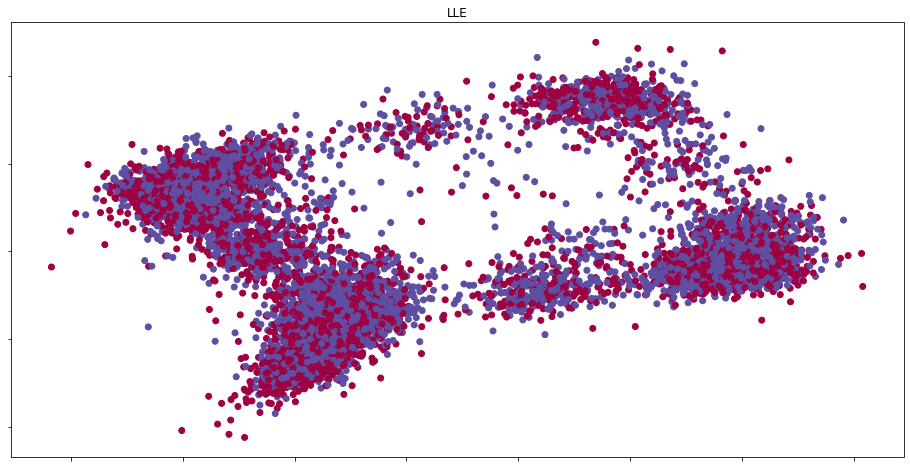

Isomap: 1.1e+02 sec


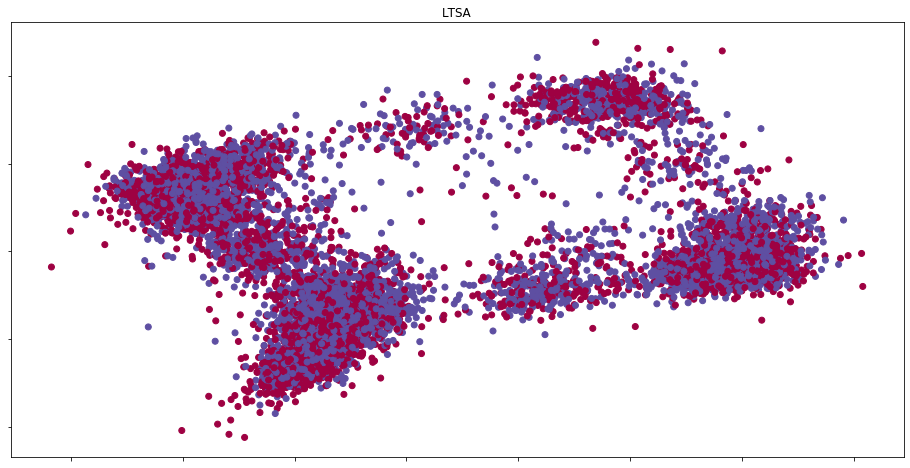

/data/anaconda3/lib/python3.7/site-packages/sklearn/utils/extmath.py:530: RuntimeWarning: invalid value encountered in multiply
  v *= signs[:, np.newaxis]


Isomap: 1.1e+02 sec


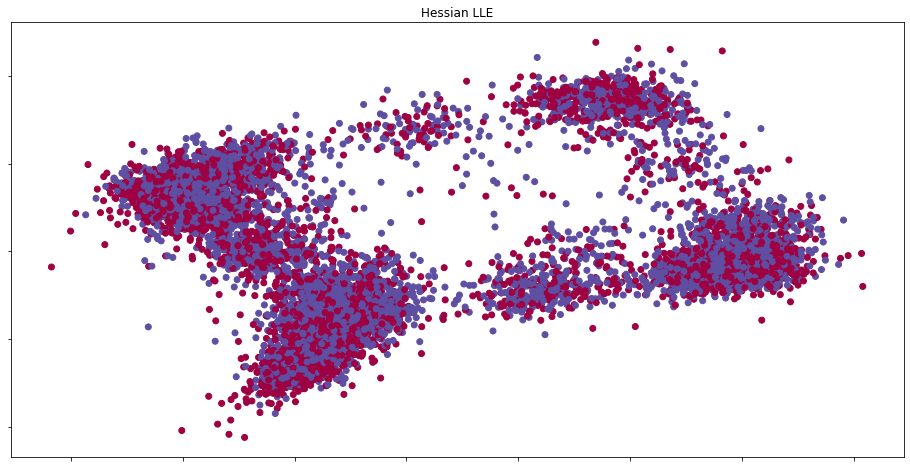

Isomap: 1.2e+02 sec


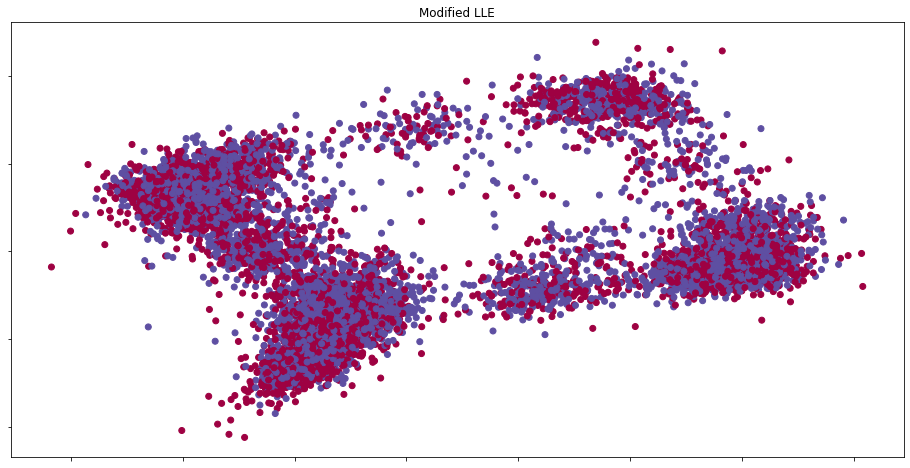

MDS: 2.8e+02 sec


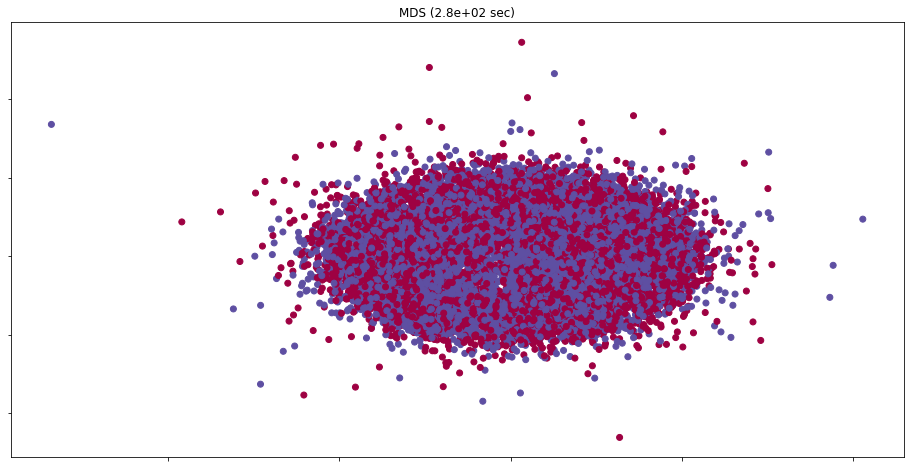

SpectralEmbedding: 44 sec


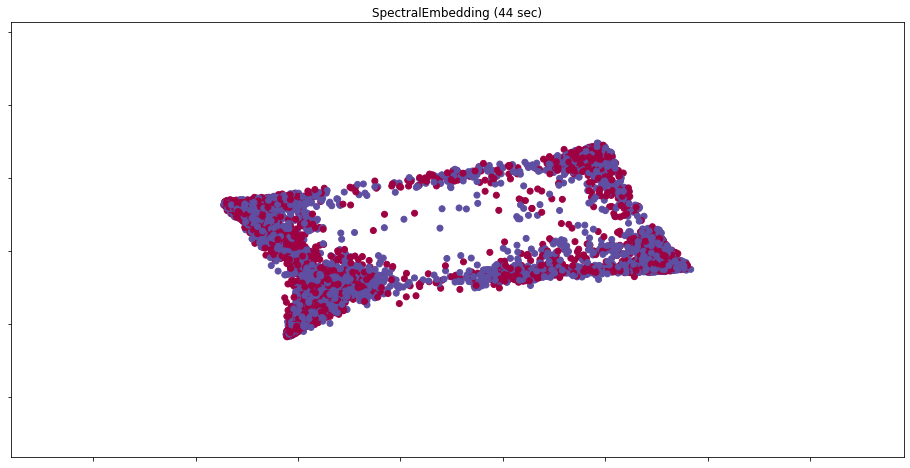

t-SNE: 45 sec


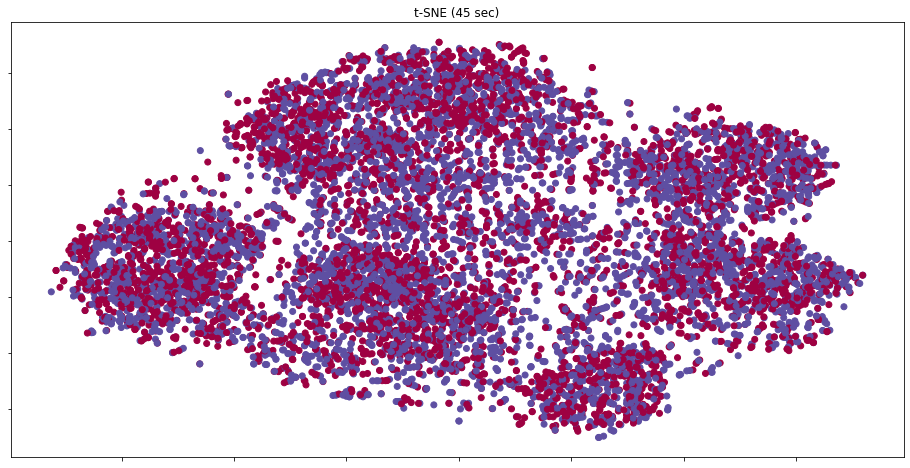

CPU times: user 1h 3min 32s, sys: 1min 2s, total: 1h 4min 34s
Wall time: 13min 51s


In [33]:
%%time

from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold
methods = ['standard', 'ltsa', 'hessian', 'modified']
labels = ['LLE', 'LTSA', 'Hessian LLE', 'Modified LLE']

n_neighbors = 10
n_components = 2
color=y_train


for i, method in enumerate(methods):
    t0 = time()
    Ytransformed = manifold.Isomap(n_neighbors, n_components, n_jobs=-1).fit_transform(X_train)
    t1 = time()
    print("Isomap: %.2g sec" % (t1 - t0))
    fig = plt.figure(figsize=(16, 8))
    ax = fig.gca()
    plt.scatter(Ytransformed[:, 0], Ytransformed[:, 1],c=color, cmap=plt.cm.Spectral)
    plt.title(labels[i])
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')
    plt.show()


t0 = time()
mds = manifold.MDS(n_components, max_iter=100, n_init=1, n_jobs=-1)
Ytransformed = mds.fit_transform(X_train)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
fig = plt.figure(figsize=(16, 8))
ax = fig.gca()
plt.scatter(Ytransformed[:, 0], Ytransformed[:, 1], c=color,cmap=plt.cm.Spectral)
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
plt.show()


t0 = time()
se = manifold.SpectralEmbedding(n_components=n_components,
                                n_neighbors=n_neighbors,
                                n_jobs=-1)
Ytransformed = se.fit_transform(X_train)
t1 = time()
print("SpectralEmbedding: %.2g sec" % (t1 - t0))
fig = plt.figure(figsize=(16, 8))
ax = fig.gca()
plt.scatter(Ytransformed[:, 0], Ytransformed[:, 1], c=color,cmap=plt.cm.Spectral)
plt.title("SpectralEmbedding (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
plt.show()

t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0, n_jobs=-1)
Ytransformed = tsne.fit_transform(X_train)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
fig = plt.figure(figsize=(16, 8))
ax = fig.gca()
plt.scatter(Ytransformed[:, 0], Ytransformed[:, 1], c=color,cmap=plt.cm.Spectral)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

plt.show()

# 4. Feature Transformation using PCA

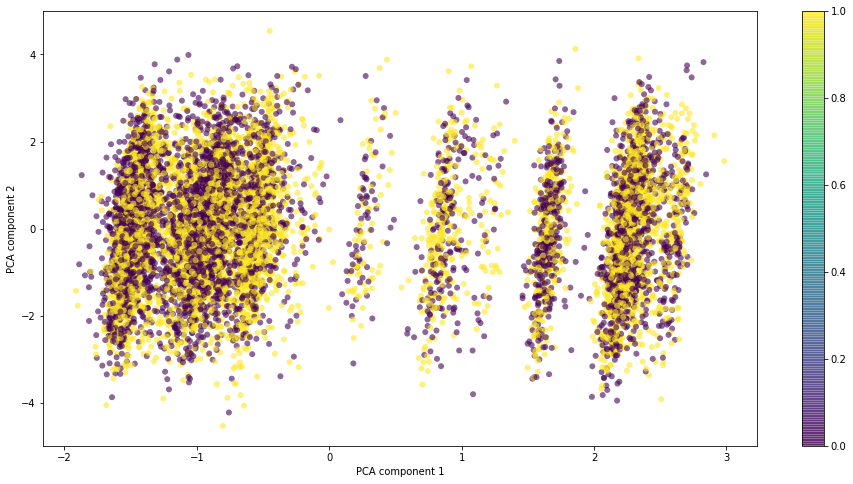

Explained Variance: [0.11675805 0.09773677 0.08504891 0.07073058 0.06598328 0.05667145
 0.05645659 0.05431017 0.05216481 0.0451427  0.04236952 0.03873282
 0.03818627 0.03710655 0.02624647 0.02087842 0.01946626 0.01833357
 0.01650435 0.01048494 0.00786502 0.00680588 0.00586647 0.00531584
 0.00259944]


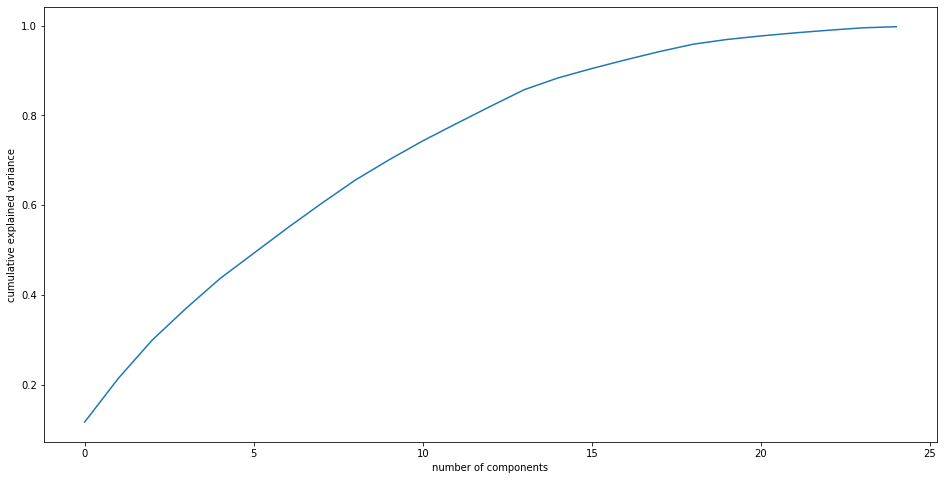

In [13]:
# Feature decomposition  with PCA
from sklearn.decomposition import PCA
# feature extraction
pca = PCA(n_components=2)
fit = pca.fit(X_train)
projected = pca.fit_transform(X_train)

plt.figure(figsize=(16, 8))
plt.scatter(projected[:, 0], projected[:, 1],
            c=y_train, edgecolor='none', alpha=0.6)
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.rcParams['figure.figsize'] = (8, 8)
plt.colorbar()
plt.show()

plt.figure(figsize=(16, 8))
pca = PCA(n_components=25)
fit = pca.fit(X_train)
plt.plot(np.cumsum(fit.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
# summarize components
print("Explained Variance: %s" % fit.explained_variance_ratio_)

##### 5. Feature Selection impact and scores on Training Data

In [14]:
%%time

from sklearn import preprocessing
from sklearn.feature_selection import chi2

min_max_scaler = preprocessing.MinMaxScaler()
scaler = min_max_scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
chi2_score = chi2(X_train_scaled, y_train)[0]
features = [
    'x1',
    'x2',
    'x3',
    'x4',
    'x5',
    'x6',
    'x7',
    'x8',
    'x9',
    'x10',
    'x11',
    'x12',
    'x13',
    'x14',
    'x15',
    'x16',
    'x17',
    'x18',
    'x19',
    'x20',
    'x21',
    'x22',
    'x23',
    'x24',
    'x25',
    'x26',
    'x27',
    'x28']
fscores = zip(features, chi2_score)
wchi2 = sorted(fscores, key=lambda x: x[1], reverse=True)
scores_labels = np.asarray(wchi2)
print(scores_labels)
label = [row[0] for row in scores_labels]
print(label)
score = [row[1] for row in scores_labels]
print(score)
y_pos = np.arange(len(score))
yrange = range(len(score))
print(yrange)

[['x26' '8.90346287406175']
 ['x13' '8.87376723281434']
 ['x4' '6.074553078659525']
 ['x17' '5.020814821701417']
 ['x21' '3.0510676840250426']
 ['x9' '1.9768680369522342']
 ['x27' '1.9373519120567897']
 ['x18' '1.9097998330104589']
 ['x6' '1.6978376560701287']
 ['x1' '1.3412511268408436']
 ['x10' '0.7150322189439331']
 ['x11' '0.3380142518418922']
 ['x25' '0.32381562342198156']
 ['x14' '0.3217357786257089']
 ['x2' '0.2731791917071137']
 ['x5' '0.16518358983681058']
 ['x23' '0.08502543884201084']
 ['x19' '0.04429125896575994']
 ['x8' '0.03693118126531352']
 ['x20' '0.032601053018877967']
 ['x3' '0.02482112189541072']
 ['x15' '0.012855629792170625']
 ['x12' '0.009810181623281095']
 ['x22' '0.007427262051606738']
 ['x16' '0.006749348941105567']
 ['x24' '0.0067202380480087705']
 ['x7' '0.0023612319542283405']]
['x26', 'x13', 'x4', 'x17', 'x21', 'x9', 'x27', 'x18', 'x6', 'x1', 'x10', 'x11', 'x25', 'x14', 'x2', 'x5', 'x23', 'x19', 'x8', 'x20', 'x3', 'x15', 'x12', 'x22', 'x16', 'x24', 'x7']
[

# 6. Model Creation, Tuning Hyperparameters and Validation using Train Data¶

In [17]:
%%time

# perform grid search to find the best parameter for Logistic Regression,
# Perceptron, Naive Bayes, LDA algorithm
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# using roc AUC as scoring
scoring = 'accuracy'

# Naive Bayes
naiveBayes = GaussianNB()
nbscore = cross_val_score(naiveBayes, X_train, y_train, cv=3, scoring=scoring)
print('Naive Bayes CV score =', np.mean(nbscore))


# penalty
penalties = np.array(['l1', 'l2'])
# C for logistic regression
c_values = np.array([1000, 100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001])
# max iteration
iters = np.array([100, 150])
LR_param_grid = {'penalty': penalties, 'C': c_values, 'max_iter': iters}

# logistic regression as algorithm
gridLogisticRegression = LogisticRegression(solver='saga')
# Using GridSearchCV on Training Data for LR
grid = GridSearchCV(
    estimator=gridLogisticRegression,
    param_grid=LR_param_grid,
    scoring=scoring,
    n_jobs=-1)
grid.fit(X_train, y_train)
print('LR CVScore ', grid.best_score_)
print('LR Penalty', grid.best_estimator_.penalty)
print('LR C', grid.best_estimator_.C)
print('LR Max Iterations', grid.best_estimator_.max_iter)


# Perceptron
# Using GridSearchCV on Training Data for perceptron
# alphas
alphas = np.array([0.001, 0.0001, 0.00001, 0.000001])
# iterations
pereptorn_param_grid = {'alpha': alphas, 'max_iter': iters}
grid = GridSearchCV(
    estimator=Perceptron(),
    param_grid=pereptorn_param_grid,
    scoring=scoring,
    n_jobs=-1)
grid.fit(X_train, y_train)
print('Perceptron CVScore ', grid.best_score_)
print('Perceptron alpha', grid.best_estimator_.alpha)
print('Perceptron Max Iterations', grid.best_estimator_.max_iter)

# LDA
tols = np.array([0.001, 0.00001, 0.001])
lda_param_grid = {'tol': tols}
grid = GridSearchCV(
    estimator=LinearDiscriminantAnalysis(),
    param_grid=lda_param_grid,
    scoring=scoring,
    n_jobs=-1)
grid.fit(X_train, y_train)
print('LDA CVScore ', grid.best_score_)
print('LDA tol', grid.best_estimator_.tol)


Naive Bayes CV score = 0.6020991721247709
LR CVScore  0.6096
LR Penalty l1
LR C 0.1
LR Max Iterations 100
Perceptron CVScore  0.5435
Perceptron alpha 0.001
Perceptron Max Iterations 100
LDA CVScore  0.6079
LDA tol 0.001
CPU times: user 2.02 s, sys: 574 ms, total: 2.6 s
Wall time: 3.9 s


# 7. SVM Grid Search

In [18]:
%%time

from sklearn.svm import SVC
# gamma parameter in SVM
gammas = np.array([1, 0.1, 0.01, 0.001])
# C for logistic regression
c_values = np.array([100, 1, 0.1, 0.01])
svm_param_grid = {'gamma': gammas, 'C': c_values}
svm = SVC(kernel='rbf')
scoring = 'accuracy'
grid = GridSearchCV(estimator=svm, param_grid=svm_param_grid, scoring=scoring, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_estimator_.gamma)
print(grid.best_estimator_.C)


0.642
0.01
100.0
CPU times: user 21.1 s, sys: 266 ms, total: 21.4 s
Wall time: 1min 1s


# 8. Pipeline with Feature Reduction Selection, Logistic Regression using Grid Search 

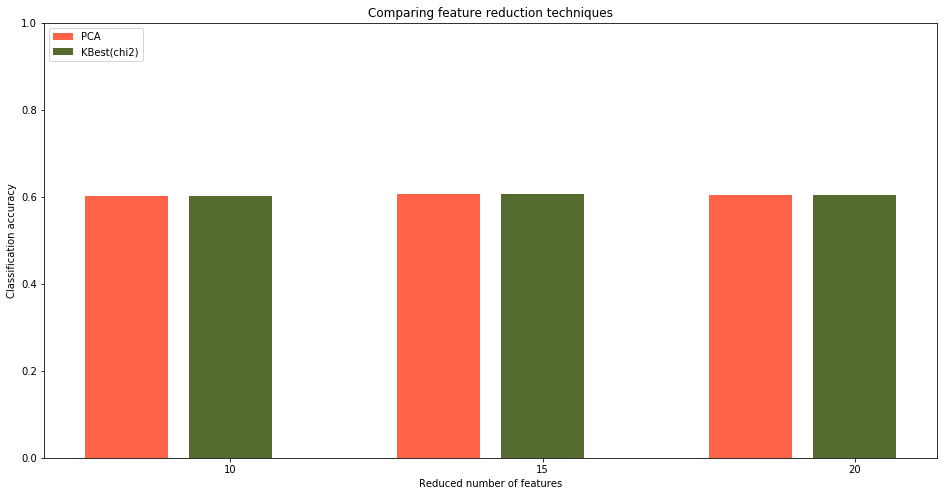

CPU times: user 8.91 s, sys: 284 ms, total: 9.2 s
Wall time: 2.08 s


In [21]:
%%time

# Modified the Code for changes
# Original Authors: Robert McGibbon, Joel Nothman, Guillaume Lemaitre

from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn import preprocessing

# transform the features using MinMaxScaler as many are negatives
min_max_scaler = preprocessing.MinMaxScaler()
scaler = min_max_scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

pipe = Pipeline([
    ('reduce_dim', PCA()),
    ('classify', LogisticRegression())
])

N_FEATURES_OPTIONS = [10, 15, 20]
C_OPTIONS = [0.001, 0.1, 1, 10, 100, 1000]
max_iter_OPTIONS = [100, 150]
param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=10)],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS,
        'classify__max_iter':max_iter_OPTIONS
    },
    {
        'reduce_dim': [SelectKBest(chi2)],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS,
        'classify__max_iter':max_iter_OPTIONS
    },
]
reducer_labels = ['PCA', 'KBest(chi2)']

grid = GridSearchCV(pipe, cv=3, n_jobs=-1, param_grid=param_grid)
grid.fit(X_train_scaled, y_train)

mean_scores = np.array(grid.cv_results_['mean_test_score'])
# scores are in the order of param_grid iteration, which is alphabetical
mean_scores = mean_scores.reshape(len(C_OPTIONS), -1, len(N_FEATURES_OPTIONS))
# select score for best C
mean_scores = mean_scores.max(axis=0)
bar_offsets = (np.arange(len(N_FEATURES_OPTIONS)) *
               (len(reducer_labels) + 1) + .5)

plt.figure(figsize=(16, 8))
COLORS = ['tomato', 'darkolivegreen', 'lightsteelblue']
for i, (label, reducer_scores) in enumerate(zip(reducer_labels, mean_scores)):
    plt.bar(bar_offsets + i, reducer_scores, label=label, color=COLORS[i])

plt.title("Comparing feature reduction techniques")
plt.xlabel('Reduced number of features')
plt.xticks(bar_offsets + len(reducer_labels) / 2, N_FEATURES_OPTIONS)
plt.ylabel('Classification accuracy')
plt.ylim((0, 1))
plt.legend(loc='upper left')
plt.show()


# 9. Learning Curves on the Model with Training and Validation 

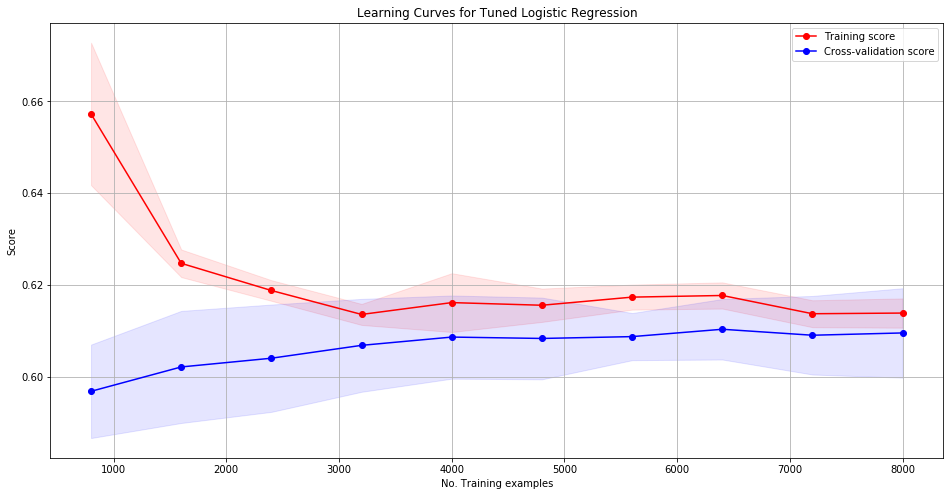

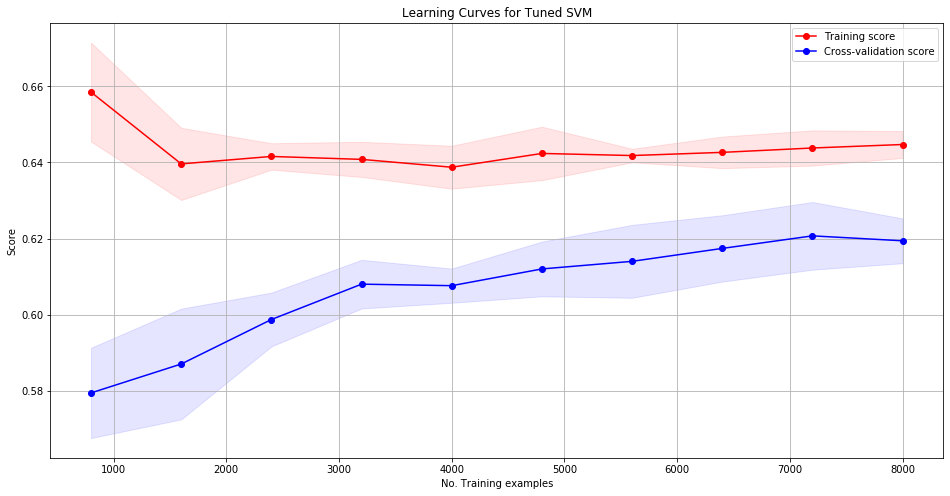

CPU times: user 810 ms, sys: 36.7 ms, total: 847 ms
Wall time: 14.2 s


In [22]:
%%time

# learning curves
from sklearn.model_selection import learning_curve


def plot_learning_curve(estimator, name, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 10)):
    plt.figure(figsize=(16, 8))
    plt.title('Learning Curves for ' + name)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("No. Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="b")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="b",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


estimator = LogisticRegression(C=0.1, penalty='l1', max_iter=100, solver='saga')
plot_learning_curve(estimator, 'Tuned Logistic Regression', X_train, y_train)
plt.rcParams['figure.figsize'] = (7, 7)
plt.show()
estimator = SVC(C=1, gamma=0.01, kernel='rbf')
plot_learning_curve(estimator, 'Tuned SVM', X_train, y_train)
plt.rcParams['figure.figsize'] = (7, 7)
plt.show()


# 10. Model Selection, Training on Entire Train set and Estimating on Test Set

In [23]:
%%time

from time import time
from sklearn import metrics
# train and test classifiers


def train_and_test(clf):
    print('_' * 80)
    print("Training: ")
    print(clf)
    t0 = time()
    clf.fit(X_train, y_train)
    train_time = time() - t0
    print("train time: %0.3fs" % train_time)

    t0 = time()
    pred = clf.predict(X_test)
    test_time = time() - t0
    print("test time:  %0.3fs" % test_time)

    score = metrics.accuracy_score(y_test, pred)
    print("accuracy:   %0.3f" % score)
    print("classification report:")
    print(metrics.classification_report(y_test, pred))
    print()
    clf_descr = str(clf).split('(')[0]
    return clf_descr, score, train_time, test_time


results = []
for classifier, name in (
    (LogisticRegression(
        C=0.1, penalty='l2', max_iter=100), "Logistic Regressin"), (Perceptron(
            alpha=0.001, max_iter=100), "Perceptron"), (LinearDiscriminantAnalysis(
                tol=0.001), "LDA"), (GaussianNB(), "Naive Bayes"), (SVC(
                    C=100, gamma=0.01, kernel='rbf'), "SVM")):
    print('=' * 80)
    print(name)
    results.append(train_and_test(classifier))

    
indices = np.arange(len(results))
results = [[x[i] for x in results] for i in range(4)]

Logistic Regressin
________________________________________________________________________________
Training: 
LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
train time: 0.118s
test time:  0.001s
accuracy:   0.612
classification report:
              precision    recall  f1-score   support

         0.0       0.59      0.52      0.55      2315
         1.0       0.63      0.69      0.66      2685

    accuracy                           0.61      5000
   macro avg       0.61      0.61      0.61      5000
weighted avg       0.61      0.61      0.61      5000


Perceptron
________________________________________________________________________________
Training: 
Perceptron(alpha=0.001, class_weight=None, early_stop

# 7. Plotting ROC Curves on Trained Models on Test Set

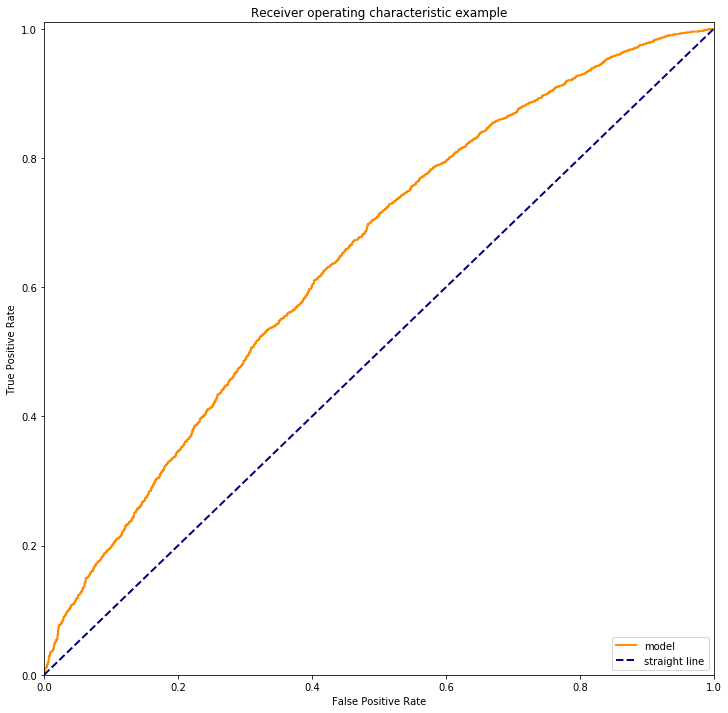

CPU times: user 7.61 s, sys: 245 ms, total: 7.85 s
Wall time: 408 ms


In [24]:
%%time

lr = LogisticRegression(C=0.1, penalty='l2', max_iter=150)
lr.fit(X_train, y_train)
lrpreds = lr.predict_proba(X_test)[:,1]
lr_fpr, lr_tpr, _ = metrics.roc_curve(y_test, lrpreds)
plt.figure(figsize=(12, 12))
lw = 2
plt.plot(lr_fpr, lr_tpr, color='darkorange',
         lw=lw)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(labels=['model', 'straight line'], loc="lower right")
plt.rcParams['figure.figsize'] = (5,5)
plt.show()

## 8. Using Other Algorithms 

KNN: 0.592365 (0.014309)
CART: 0.600812 (0.012416)
Bag: 0.752976 (0.012439)
RF: 0.757054 (0.012479)
Bo: 0.600045 (0.011421)
ELE: 0.669729 (0.009085)
CPU times: user 314 ms, sys: 20.5 ms, total: 335 ms
Wall time: 29.5 s


[Text(0, 0, 'KNN'),
 Text(0, 0, 'CART'),
 Text(0, 0, 'Bag'),
 Text(0, 0, 'RF'),
 Text(0, 0, 'Bo'),
 Text(0, 0, 'ELE')]

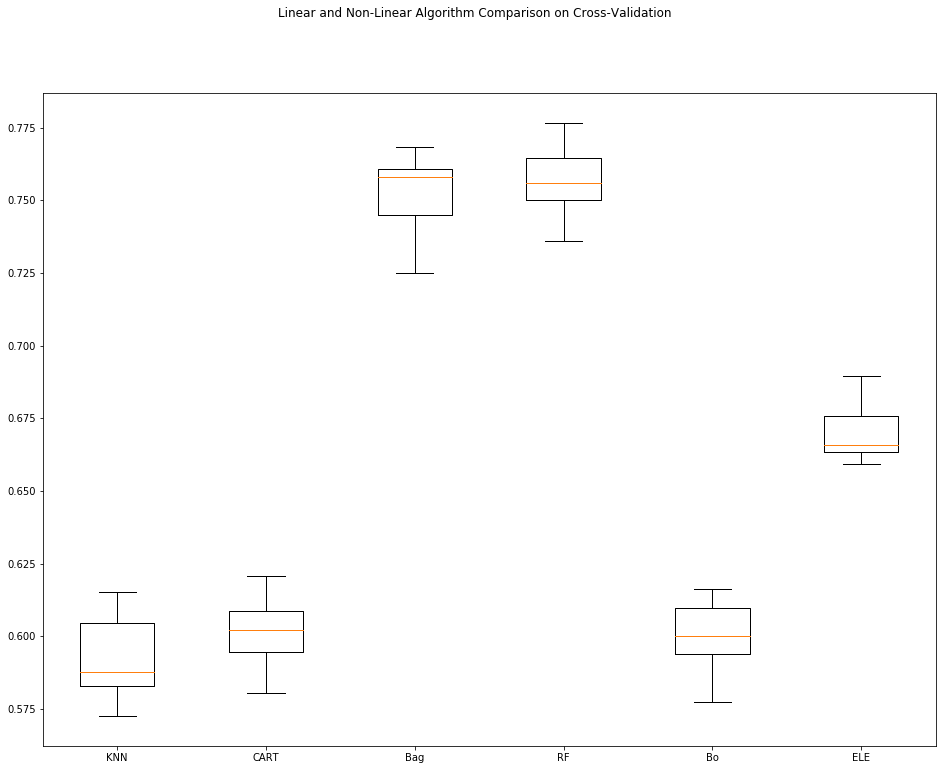

In [26]:
%%time

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold

# prepare models
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('Bag', BaggingClassifier(DecisionTreeClassifier(),100, random_state=7)))
models.append(('RF', RandomForestClassifier(100, max_features=5)))
models.append(('Bo', AdaBoostClassifier(DecisionTreeClassifier(),100, random_state=7)))
# create a voting estimation 
estimators = []
estimators.append(('logistic',LogisticRegression()))
estimators.append(('NB',  GaussianNB()))
models.append(('ELE',VotingClassifier(estimators, voting='soft')))


# evaluate each model in turn
results = []
names = []
scoring = 'roc_auc'
# replace with 'accuracy', 'neg_log_loss',.. based on the need
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring, n_jobs=-1)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure(figsize=(16, 12)) 
fig.suptitle('Linear and Non-Linear Algorithm Comparison on Cross-Validation') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names)